# ANN & MNIST : exercise
---

## 라이브러리 불러오기

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [39]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [40]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [41]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 8148
다음 그림은 숫자 8 입니다.


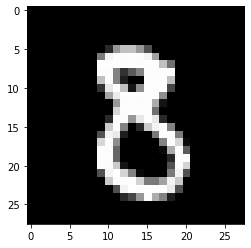

In [42]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)
# id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [43]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [44]:
train_x_re = train_x.reshape( (train_x.shape[0], -1) )
train_x_re.shape

(60000, 784)

In [45]:
test_x_re = test_x.reshape( (test_x.shape[0], -1) )

* min-max scaling

#### sklearn-minmaxscaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
mm_scale = MinMaxScaler()

In [34]:
train_x_re.max(), train_x_re.min(), test_x_re.max(), test_x_re.min()

(255, 0, 255, 0)

In [35]:
train_x_re = mm_scale.fit_transform(train_x_re)

In [ ]:
train_x_re.max(), train_x_re.min()

In [37]:
test_x_re = mm_scale.transform(test_x_re)

In [ ]:
test_x_re.max(), test_x_re.min()

#### 정석

In [ ]:
max_n, min_n = train_x_re.max(), train_x_re.min()
max_n, min_n

In [47]:
train_x_re = (train_x_re - min_n) / (max_n - min_n)
test_x_re = (test_x_re - min_n) / (max_n - min_n)

In [ ]:
train_x_re.max(), train_x_re.min()

In [ ]:
test_x_re.max(), test_x_re.min()

* target feature : One-hot Encoding

In [50]:
train_y.shape, test_y.shape

((60000,), (10000,))

In [51]:
from tensorflow.keras.utils import to_categorical

In [54]:
class_n = len(set(train_y))

In [55]:
# to_categorical() 알아서 클래스를 자동으로 잘 분류해줌
# train_y = to_categorical(train_y)
# test_y = to_categorical(test_y)

train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [56]:
train_y.shape, test_y.shape

((60000, 10), (10000, 10))

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [58]:
train_x_re.shape, train_y.shape

((60000, 784), (60000, 10))

In [81]:
########################
# 모델링 I : .fit( ) 까지! : Sequential API
########################
# 1번. 세션 클리어 : 기존의 모델 구조가 남아있다면 지워줘
keras.backend.clear_session()

# 2번. 모델 선언 : 레이어 블록을 조립할 발판!
model = keras.models.Sequential()

# 3번. 레이어 조립 : .add()
model.add(keras.layers.Input(shape=(784,)) )
model.add(keras.layers.Dense(10, activation='softmax') )

# 4번. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [82]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
es = EarlyStopping(monitor='val_loss',     # EarlyStopping의 기준을 무엇으로 삼을래?
                   patience=5,             # 관측 대상의 성능이 향상되지 않을 때, 몇 번 지켜볼래
                   min_delta=0,            # Threshold, val_loss 기준으로는, 성능이 나빠지지만 않아도 괜찮아.
                   verbose=1,
                   restore_best_weights=True) # 관측 대상의 성능이 가장 좋았던 epoch의 가중치 적용!

In [84]:
model.fit(train_x_re, train_y, epochs=100, verbose=1,
          callbacks=[es], validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5085 - accuracy: 0.8686 - val_loss: 0.3183 - val_accuracy: 0.9133
Epoch 2/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3177 - accuracy: 0.9112 - val_loss: 0.2863 - val_accuracy: 0.9214
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2930 - accuracy: 0.9180 - val_loss: 0.2768 - val_accuracy: 0.9245
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2814 - accuracy: 0.9205 - val_loss: 0.2733 - val_accuracy: 0.9263
Epoch 5/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9235 - val_loss: 0.2666 - val_accuracy: 0.9261
Epoch 6/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2684 - accuracy: 0.9250 - val_loss: 0.2629 - val_accuracy: 0.9291
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2639 - accuracy: 0.9259 - val_loss: 0.2668 - val_ac

In [86]:
pred_train = model.predict(train_x_re)
pred_test = model.predict(test_x_re)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 93.40%
테스트 정확도 : 92.86%


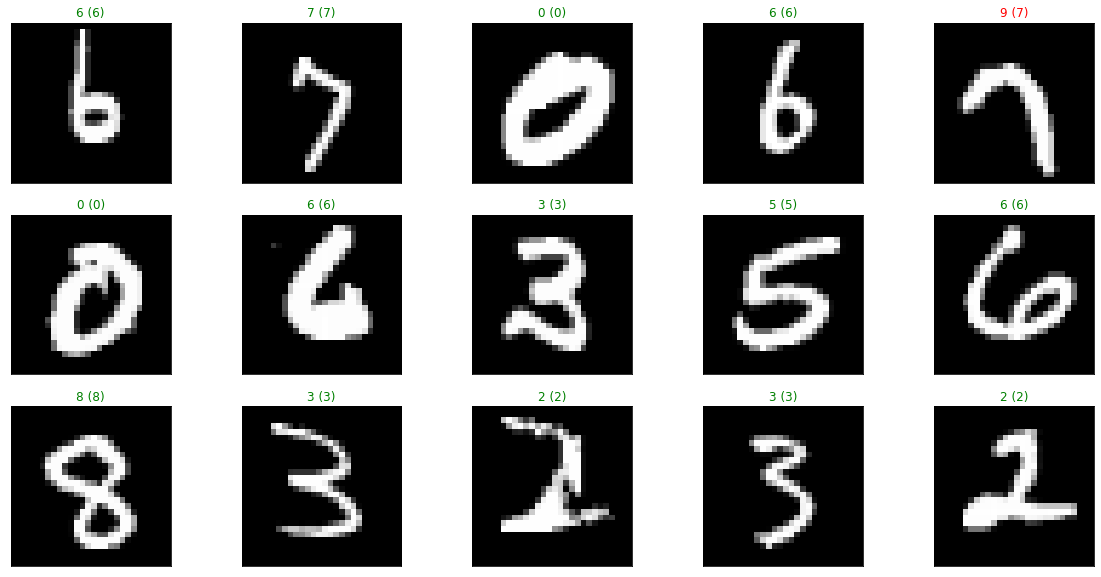

In [88]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 8520
다음 그림은 숫자 4 입니다.
모델의 예측 : 9
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  2.  0.  0.  0.  5. 90.]
틀렸어요


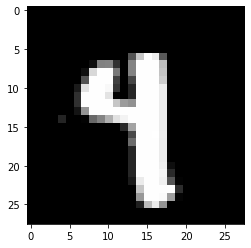

In [91]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [93]:
model.evaluate(test_x_re, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.9286


[0.2659880220890045, 0.928600013256073]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [94]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000, 10))

In [97]:
#########################
# 모델링 II : .fit( ) 까지! : Sequential API
#########################
# 1번 세션 클리어
keras.backend.clear_session()

# 2번 모델 선언
model = keras.models.Sequential()

# 3번 모델 블록 조립
model.add( keras.layers.Input(shape=(28,28)) )
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense(128, activation='relu') )
model.add( keras.layers.Dense(128, activation='relu') )
model.add( keras.layers.Dense(128, activation='relu') )
model.add( keras.layers.Dense(10, activation='softmax'))

# 4번 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [98]:
es = EarlyStopping(monitor='val_loss',            # 관측 대상
                   min_delta=0,                   # threshold
                   patience=5,                    # 관측 대상 성능이 개선되지 않을때 몇번 참을래
                   verbose=1,
                   restore_best_weights=True)     # 최적의 epoch 가중치를 적용할래

In [99]:
model.fit(train_x, train_y, epochs=100, verbose=1,
          callbacks=[es], validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.1627 - accuracy: 0.8610 - val_loss: 0.2968 - val_accuracy: 0.9294
Epoch 2/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2587 - accuracy: 0.9333 - val_loss: 0.2193 - val_accuracy: 0.9410
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1849 - accuracy: 0.9493 - val_loss: 0.1956 - val_accuracy: 0.9465
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1609 - accuracy: 0.9549 - val_loss: 0.1563 - val_accuracy: 0.9568
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1346 - accuracy: 0.9621 - val_loss: 0.1686 - val_accuracy: 0.9521
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1132 - accuracy: 0.9666 - val_loss: 0.1839 - val_accuracy: 0.9553
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1009 - accuracy: 0.9706 - val_loss: 0.1577 - val_ac

In [101]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 97.69%
테스트 정확도 : 96.51%


Exception ignored in: <function UniquePtr.__del__ at 0x7fd7c69ae4c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/c_api_util.py", line 70, in __del__
    def __del__(self):
KeyboardInterrupt: 


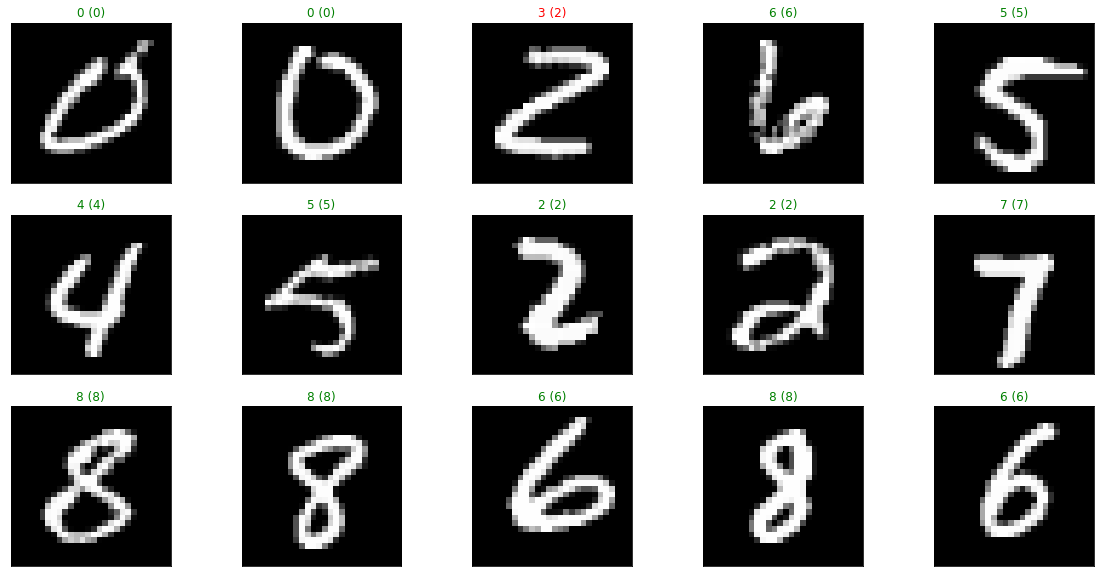

In [102]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 214
다음 그림은 숫자 9 입니다.
모델의 예측 : 8
모델의 카테고리별 확률 : [ 0.  0.  0. 18.  0.  0.  0.  1. 48. 31.]
틀렸어요


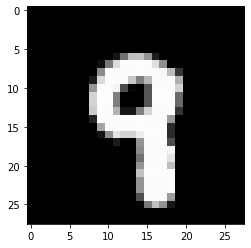

In [106]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)